## TRANSACTION DATA (CREDIT FRAUD) - EDA

 Sumber dataset : https://drive.google.com/file/d/1sr0k8_k7huFuHiR_C5P_r60VaBDzwoTb/view

Tahap ini merupakan tahap eksplorasi data, namun juga akan mencakup preprocessing. Sehingga setiap feature dari data yang di eksplorasi akan bersih dari **Null Values**, serta **sesuai dengan definisi dari tiap features**. Tujuan eksplorasi data ini adalah untuk mengetahui lebih lanjut pola dari customer yang melakukan **fraud**. Eksplorasi data di lakukan dalam beberapa tahap dan di lakukan berdasarkan kelompok data. Eksplorasi awal ke target features - ****isFraud****, lalu eksplorasi ke kelompok ***numerical, categorical*** dan terakhir ekplorasi ke features ***datetime***.

### FEATURE DESCRIPTION :

- accountNumber             = The account number of The customer
- customerId    =  The ID of The customer
- creditLimit               =  The amount of money that can be charged to The debit card
- availableMoney        = The amount of money in The debit card before adjusting for pending charges      
- transactionDateTime       = The transaction timestamp when it happened
- transactionAmount        = The amount of transaction 
- merchantName          = The merchant name of The particular transaction
- acqCountry             = The country where The merchant is located
- merchantCountryCode    = The country code for The specific merchant
- posEntryMode        = a code that tells The processor how The transaction was captured
- posConditionCode   = a code identifying transaction conditions at The point-of-sale or point-of-service
- merchantCategoryCode    = The merchant category/types
- currentExpDate       =  The expiry date of The credit card
- accountOpenDate      = The date when The customer open The credit card
- dateOfLastAddressChange    = The last date when The customer change The credit card address
- cardCVV = The actual card verification value
- enteredCVV       = The entered card verification value
- cardLast4Digits     = The last 4 digits of The debit card
- transactionType        = The types of transactions
- isFraud      = The status of The fraud transaction
- echoBuffer    = number of delayed response transactions
- currentBalance =  The current balance of The debit card
- merchantCity = The location for The specific merchant (City)
- merchantState   = The location for The specific merchant (State)
- merchantZip = The location for The specific merchant (Zip Code)           
- cardPresent =     The physical presence of The debit card in The transaction
- posOnPremises = The location of The point of sales          
- recurringAuthInd  = wheTher The auThentication recurred or not
- expirationDateKeyInMatch = The match between The expiration date in The system and what was inputted

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

import warnings 
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

## OVERVIEW

> Pertama - tama, load semua datanya.

In [2]:
df = pd.read_csv('transactions.csv')

In [3]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [4]:
df.tail()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
641909,186770399,186770399,7500,2574.02,2016-12-04T12:29:21,5.37,Apple iTunes,US,US,5.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,4925.98,False,False
641910,186770399,186770399,7500,2568.65,2016-12-09T04:20:35,223.70,Blue Mountain eCards,US,US,9.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,4931.35,False,False
641911,186770399,186770399,7500,2344.95,2016-12-16T07:58:23,138.42,Fresh Flowers,US,US,2.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,5155.05,False,False
641912,186770399,186770399,7500,2206.53,2016-12-19T02:30:35,16.31,abc.com,US,US,9.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,5293.47,False,False
641913,186770399,186770399,7500,2190.22,2016-12-28T11:14:14,32.53,Next Day Online Services,US,US,9.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,5309.78,False,False


> Diatas adalah 5 data teratas, dan 5 data terbawah pada dataframe ini. Dan di bawah ini adalah summary dari setiap features pada dataset ini.

In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,accountNumber,int64,0,0.0,5000,"[413822245, 392114181]"
1,customerId,int64,0,0.0,5000,"[119396992, 667315366]"
2,creditLimit,int64,0,0.0,10,"[50000, 2500]"
3,availableMoney,float64,0,0.0,450517,"[47677.46, 5820.48]"
4,transactionDateTime,object,0,0.0,635472,"[2016-10-15T03:08:03, 2016-04-22T00:05:53]"
5,transactionAmount,float64,0,0.0,62735,"[374.97, 590.41]"
6,merchantName,object,0,0.0,2493,"[Domino's Pizza #926687, KFC #928167]"
7,acqCountry,object,3913,0.6,4,"[MEX, nan]"
8,merchantCountryCode,object,624,0.1,4,"[MEX, US]"
9,posEntryMode,float64,3345,0.5,5,"[90.0, 9.0]"


> Terdapat **Null values** pada beberapa features.

In [6]:
# Data dengan Null values

df.shape

(641914, 23)

In [7]:
# Drop semua Null values

df.dropna().shape

(633846, 23)

> Drop semua **Null values** karena jumlah data setelah di drop tidak jauh berbeda dengan sebelumnya. Dalam hal ini missing values termasuk dalam *Missing Completely at Random*.

In [8]:
# Drop feature yang tidak relevan & drop Null values

df = df.dropna()

In [9]:
# Data setelah di drop

pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,accountNumber,int64,0,0.0,5000,"[109715289, 485058714]"
1,customerId,int64,0,0.0,5000,"[890459814, 527489111]"
2,creditLimit,int64,0,0.0,10,"[1000, 50000]"
3,availableMoney,float64,0,0.0,446204,"[2044.48, 4709.24]"
4,transactionDateTime,object,0,0.0,627556,"[2016-10-19T00:24:34, 2016-05-02T00:50:38]"
5,transactionAmount,float64,0,0.0,62571,"[355.04, 421.53]"
6,merchantName,object,0,0.0,2491,"[Tim Hortons #947751, Sunoco Gas #623266]"
7,acqCountry,object,0,0.0,4,"[PR, US]"
8,merchantCountryCode,object,0,0.0,4,"[CAN, MEX]"
9,posEntryMode,float64,0,0.0,5,"[2.0, 80.0]"


>`describe()` digunakan untuk melihat measure of central tendency, quantile, min dan max pada setiap features.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountNumber,633846.0,5.547627e+08,2.547414e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.865589e+08,9.999853e+08
customerId,633846.0,5.547627e+08,2.547414e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.865589e+08,9.999853e+08
creditLimit,633846.0,1.069852e+04,1.146247e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,633846.0,6.652951e+03,9.229448e+03,-1.244930e+03,1.115890e+03,3.578050e+03,8.161843e+03,5.000000e+04
transactionAmount,633846.0,1.351906e+02,1.470953e+02,0.000000e+00,3.232000e+01,8.582000e+01,1.890500e+02,1.825250e+03
posEntryMode,633846.0,9.132774e+00,1.695389e+01,2.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+01
posConditionCode,633846.0,3.240931e+00,9.693157e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
cardCVV,633846.0,5.571258e+02,2.573074e+02,1.000000e+02,3.340000e+02,5.810000e+02,7.610000e+02,9.980000e+02
enteredCVV,633846.0,5.566958e+02,2.573850e+02,1.000000e+00,3.330000e+02,5.795000e+02,7.610000e+02,9.980000e+02
cardLast4Digits,633846.0,4.885631e+03,2.859074e+03,0.000000e+00,2.362000e+03,4.873000e+03,7.267000e+03,9.998000e+03


> Dibawah ini adalah `describe()` untuk data selain data continous. Terdapat unique (kategori yg berbeda), top (data tersering muncul), dan freq (jumlah seringnya muncul).

In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
transactionDateTime,633846,627556,2016-08-23T15:20:40,3
merchantName,633846,2491,Lyft,24973
acqCountry,633846,4,US,628193
merchantCountryCode,633846,4,US,628201
merchantCategoryCode,633846,19,online_retail,159509
currentExpDate,633846,165,1/8/2020,4144
accountOpenDate,633846,1826,11/12/2015,10020
dateOfLastAddressChange,633846,2186,20/7/2016,3904
transactionType,633846,3,PURCHASE,601556


>Dari data di atas, terlihat bahwa ada beberapa features memiliki data tipe yang masih belum tepat. Kita akan perbaiki di *preprocessing*.

### PREPROCESSING

> Pertama kita drop data yang tidak penting untuk proses EDA dan Machine Learning. Setelah itu kelompokkan data berdasarkan tipenya.

In [12]:
df.drop(columns = ['accountNumber', 'customerId', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'merchantName'], axis = 1, inplace = True)

In [13]:
df.head(3)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,5000,5000.00,2016-01-08T19:04:50,111.33,US,US,5.0,1.0,rideshare,1/4/2020,3/8/2014,3/8/2014,PURCHASE,True,0.00,False,False
1,5000,4888.67,2016-01-09T22:32:39,24.75,US,US,9.0,1.0,rideshare,1/6/2023,3/8/2014,3/8/2014,PURCHASE,False,111.33,False,False
2,5000,4863.92,2016-01-11T13:36:55,187.40,US,US,5.0,1.0,rideshare,1/12/2027,3/8/2014,3/8/2014,PURCHASE,False,136.08,False,False


In [14]:
# Kelompokkan data type object

df.select_dtypes(['object']).head(3)

,transactionDateTime,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
0,2016-01-08T19:04:50,US,US,rideshare,1/4/2020,3/8/2014,3/8/2014,PURCHASE
1,2016-01-09T22:32:39,US,US,rideshare,1/6/2023,3/8/2014,3/8/2014,PURCHASE
2,2016-01-11T13:36:55,US,US,rideshare,1/12/2027,3/8/2014,3/8/2014,PURCHASE


In [15]:
# Kelompokkan data type int dan float

df.select_dtypes(['float64', 'int64']).head(3)

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance
0,5000,5000.00,111.33,5.0,1.0,0.00
1,5000,4888.67,24.75,9.0,1.0,111.33
2,5000,4863.92,187.40,5.0,1.0,136.08


In [16]:
# Kelompokkan data type boolean

df.select_dtypes(['bool']).head(3)

,isFraud,cardPresent,expirationDateKeyInMatch
0,True,False,False
1,False,False,False
2,False,False,False


> Untuk mempermudah, maka kita handling **Datetime** dahulu.

In [17]:
df_date = df[['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']]

In [18]:
df_date.head(3)

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,2016-01-08T19:04:50,1/4/2020,3/8/2014,3/8/2014
1,2016-01-09T22:32:39,1/6/2023,3/8/2014,3/8/2014
2,2016-01-11T13:36:55,1/12/2027,3/8/2014,3/8/2014


In [19]:
error = []
for i in df_date.columns :
    try :
        df_date[i] = pd.to_datetime(df_date[i])
    except :
        error.append(i)

In [20]:
df_date.head(3)

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,2016-01-08 19:04:50,2020-01-04,2014-03-08,2014-03-08
1,2016-01-09 22:32:39,2023-01-06,2014-03-08,2014-03-08
2,2016-01-11 13:36:55,2027-01-12,2014-03-08,2014-03-08


> Terlihat dari `info()` dibawah, tipe data berubah jadi datetime

In [21]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   transactionDateTime      633846 non-null  datetime64[ns]
 1   currentExpDate           633846 non-null  datetime64[ns]
 2   accountOpenDate          633846 non-null  datetime64[ns]
 3   dateOfLastAddressChange  633846 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 24.2 MB


> Selanjutnya handling **boolean**, untuk mempermudah proses EDA nanti.

In [22]:
df_bool = df.select_dtypes(['bool'])

In [23]:
df_bool.head(3)

,isFraud,cardPresent,expirationDateKeyInMatch
0,True,False,False
1,False,False,False
2,False,False,False


In [24]:
# dirubah menggunakan lambda 

for i in df_bool.columns :
    df_bool = df_bool.apply(lambda x : x.replace({True : 'Yes', False : 'No'}))

In [25]:
df_bool.head(3)

,isFraud,cardPresent,expirationDateKeyInMatch
0,Yes,No,No
1,No,No,No
2,No,No,No


> Terlihat di bawah ini, tipe data sudah berubah menjadi object datatype.

In [26]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   isFraud                   633846 non-null  object
 1   cardPresent               633846 non-null  object
 2   expirationDateKeyInMatch  633846 non-null  object
dtypes: object(3)
memory usage: 19.3+ MB


> Selanjutnya sebelum kita buat pengelompokkan untuk feature lainnya, kita ganti data type yang masih belum pas dengan deskripsi dan di akhir kita menggunakan `pd.concat()` untuk menyatukan semua dataframe menjadi dataframe baru, agar data dapat di bedakan dan tidak mengganggu data yang lama.

In [27]:
# ganti tipe data yang seharusnya kategorical 

for i in df[['posEntryMode', 'posConditionCode']]:
    df[i] = df[i].astype('object')

In [28]:
df[['posEntryMode', 'posConditionCode']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   posEntryMode      633846 non-null  object
 1   posConditionCode  633846 non-null  object
dtypes: object(2)
memory usage: 14.5+ MB


> Setelah berhasil semua, kita lanjutkan pengelompokkan berdasarkan data type nya.

In [29]:
df_con = df.select_dtypes(['int64', 'float64'])

In [30]:
df_con.head(3)

,creditLimit,availableMoney,transactionAmount,currentBalance
0,5000,5000.00,111.33,0.00
1,5000,4888.67,24.75,111.33
2,5000,4863.92,187.40,136.08


In [31]:
df_cat = df.select_dtypes(['object']).drop(columns = df_date.columns.tolist())

In [32]:
df_cat.head(3)

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType
0,US,US,5,1,rideshare,PURCHASE
1,US,US,9,1,rideshare,PURCHASE
2,US,US,5,1,rideshare,PURCHASE


> Menggunakan `pd.concat()` satukan semua data yang tadi terpisah dan sudah bersih.

In [33]:
df_new = pd.concat([df_cat, df_con, df_date, df_bool], axis = 1)

In [34]:
df_new.head(3)

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,creditLimit,availableMoney,transactionAmount,currentBalance,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange,isFraud,cardPresent,expirationDateKeyInMatch
0,US,US,5,1,rideshare,PURCHASE,5000,5000.00,111.33,0.00,2016-01-08 19:04:50,2020-01-04,2014-03-08,2014-03-08,Yes,No,No
1,US,US,9,1,rideshare,PURCHASE,5000,4888.67,24.75,111.33,2016-01-09 22:32:39,2023-01-06,2014-03-08,2014-03-08,No,No,No
2,US,US,5,1,rideshare,PURCHASE,5000,4863.92,187.40,136.08,2016-01-11 13:36:55,2027-01-12,2014-03-08,2014-03-08,No,No,No


> Tampilan data yang sudah bersih.

In [35]:
df_new.tail(3)

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,creditLimit,availableMoney,transactionAmount,currentBalance,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange,isFraud,cardPresent,expirationDateKeyInMatch
641911,US,US,2,1,online_gifts,PURCHASE,7500,2344.95,138.42,5155.05,2016-12-16 07:58:23,2019-01-10,2015-04-11,2016-03-06,No,No,No
641912,US,US,9,8,online_subscriptions,PURCHASE,7500,2206.53,16.31,5293.47,2016-12-19 02:30:35,2029-01-11,2015-04-11,2016-03-06,No,No,No
641913,US,US,9,1,online_gifts,PURCHASE,7500,2190.22,32.53,5309.78,2016-12-28 11:14:14,2025-01-08,2015-04-11,2016-03-06,No,No,No


In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   acqCountry                633846 non-null  object        
 1   merchantCountryCode       633846 non-null  object        
 2   posEntryMode              633846 non-null  object        
 3   posConditionCode          633846 non-null  object        
 4   merchantCategoryCode      633846 non-null  object        
 5   transactionType           633846 non-null  object        
 6   creditLimit               633846 non-null  int64         
 7   availableMoney            633846 non-null  float64       
 8   transactionAmount         633846 non-null  float64       
 9   currentBalance            633846 non-null  float64       
 10  transactionDateTime       633846 non-null  datetime64[ns]
 11  currentExpDate            633846 non-null  datetime64[ns]
 12  ac

In [37]:
pd.DataFrame({'dataFeatures' : df_new.columns, 'dataType' : df_new.dtypes.values, 
              'null' : [df_new[i].isna().sum() for i in df_new.columns],
              'nullPct' : [((df_new[i].isna().sum()/len(df_new[i]))*100).round(1) for i in df_new.columns],
              'Nunique' : [df_new[i].nunique() for i in df_new.columns],
              'uniqueSample' : [list(pd.Series(df_new[i].unique()).sample(2)) for i in df_new.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,acqCountry,object,0,0.0,4,"[US, CAN]"
1,merchantCountryCode,object,0,0.0,4,"[US, CAN]"
2,posEntryMode,object,0,0.0,5,"[90.0, 80.0]"
3,posConditionCode,object,0,0.0,3,"[99.0, 8.0]"
4,merchantCategoryCode,object,0,0.0,19,"[rideshare, gym]"
5,transactionType,object,0,0.0,3,"[ADDRESS_VERIFICATION, PURCHASE]"
6,creditLimit,int64,0,0.0,10,"[20000, 10000]"
7,availableMoney,float64,0,0.0,446204,"[3624.93, 6998.41]"
8,transactionAmount,float64,0,0.0,62571,"[612.29, 534.77]"
9,currentBalance,float64,0,0.0,403487,"[2070.79, 504.94]"


> Data yang sudah melewati preprocessing, terlihat bahwa data tersebut memiliki 4 data type yang berbeda, yaitu *int, float, object* dan *datetime*.

In [38]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
creditLimit,633846.0,10698.515097,11462.466156,250.00,5000.00,7500.00,15000.0000,50000.00
availableMoney,633846.0,6652.950985,9229.448103,-1244.93,1115.89,3578.05,8161.8425,50000.00
transactionAmount,633846.0,135.190636,147.095318,0.00,32.32,85.82,189.0500,1825.25
currentBalance,633846.0,4045.564111,5946.767669,0.00,503.43,2153.30,5006.6675,47496.50


> Melalui `describe()` kita bisa lihat bahwa measure of central tendency, min, max dan quantile dari setiap feature menjadi lebih jelas.

In [39]:
df_new.describe(include = 'object').T

,count,unique,top,freq
acqCountry,633846,4,US,628193
merchantCountryCode,633846,4,US,628201
posEntryMode,633846,5,5,253748
posConditionCode,633846,3,1,507891
merchantCategoryCode,633846,19,online_retail,159509
transactionType,633846,3,PURCHASE,601556
isFraud,633846,2,No,622954
cardPresent,633846,2,No,336201
expirationDateKeyInMatch,633846,2,No,632885


> Karena data sudah bersih, kita lanjutkan proses EDA untuk mengetahui pola pada target **isFraud** features.

## EXPLORATORY DATA ANALYSIS

> Kita akan mulai proses ini dengan melihat target feature terlebih dahulu.

### TARGET FEATURE

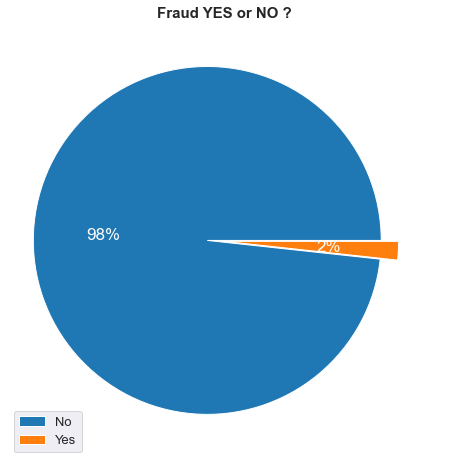

In [40]:
plt.figure(figsize = (12, 8))

plt.title('Fraud YES or NO ?', size = 15, fontweight = 'bold')

labels = 'No', 'Yes'

plt.pie(df_new['isFraud'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

> Sangat terlihat imbalanced data pada target 98% vs 2%, hal ini dapat membuat proses pencarian pola sedikit lebih sulit. Karena dari total 63.3846 data, hanya 10.892 data yang terhitung sebagai Fraud. Hal ini sepertinya cukup wajar jika kita perhatikan dalam kasus-kasus semacam ini, namun kembali lagi, ini akan dapat menyulitkan proses pencarian pola nanti.

In [41]:
df_new['isFraud'].value_counts()

No     622954
Yes     10892
Name: isFraud, dtype: int64

### NUMERICAL FEATURES

> Selanjutnya kita akan mulai dari data **numerical**, yaitu tipe data *int* dan *float*.

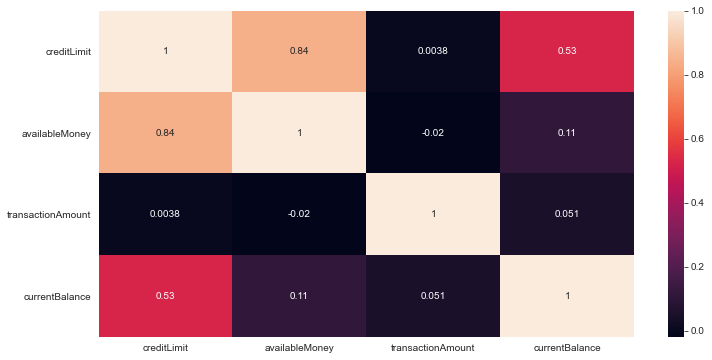

In [42]:
plt.figure(figsize = (12,6))
sns.heatmap(df_new.select_dtypes(['int64', 'float64']).corr('spearman'), annot = True)

> Melalui heatmap terlihat terdapat beberapa features dalam data kategori ini. Feature yang memiliki korelasi signifikan yaitu **creditLimit dengan availableMoney** dan **creditLimit dengan currentBalance**. Selain itu **availableMoney dengan currentBalance** juga terdapat korelasi tetapi belum cukup signifikan. 

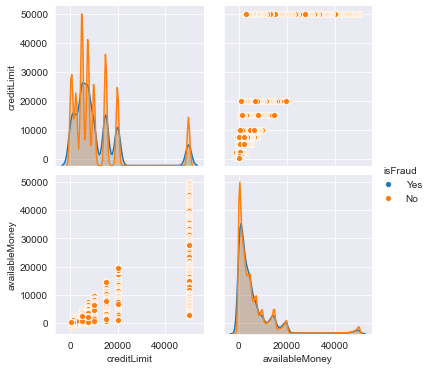

In [43]:
# creditLimit vs availableMoney

sns.pairplot(df_new[['creditLimit','availableMoney','isFraud']], hue="isFraud")

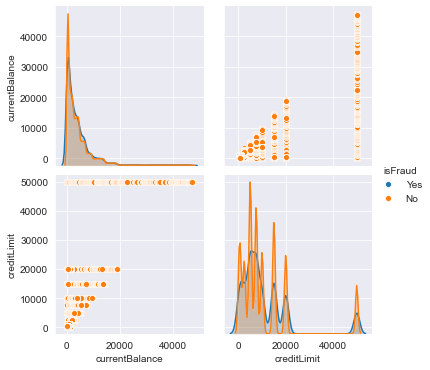

In [44]:
# currentBalance vs creditLimit

sns.pairplot(df_new[['currentBalance', 'creditLimit', 'isFraud']], hue="isFraud")

> Melalui `pairplot()` terlihat memang features2 yang disebutkan tadi diatas memiliki persebaran cukup berpola, walaupun pola persebarannya sulit dilihat, tetapi jika diperhatikan dengan seksama, kita akan menemukan pola persebaran pada customer yang **fraud** dimana kebanyakan sebaran credit limitnya masih di kisaran 20.000 dollar atau lebih rendah lagi, sementara mereka yang tidak, berada di kisaran 30.000 sampai 50.000 dollar. Sementara terlihat juga customer yang **fraud** memiliki credit limit dan available money yang cenderung lebih sedikit dibandingkan mereka yang tidak **fraud***.

In [45]:
df_con_new = df_new.select_dtypes(['int64', 'float64'])

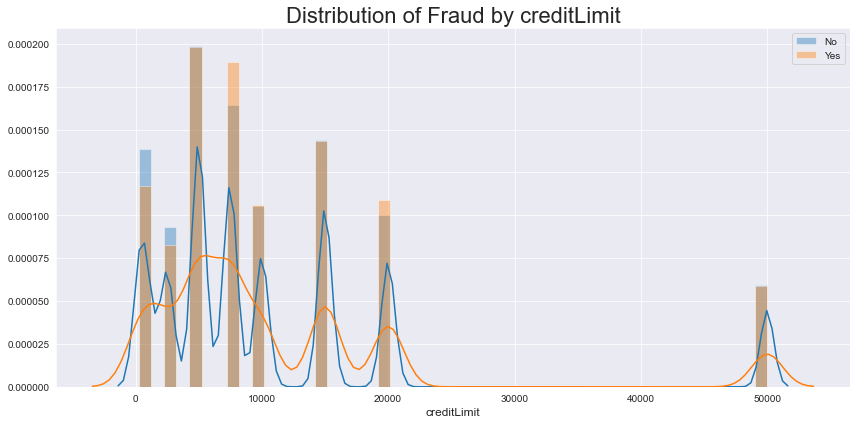

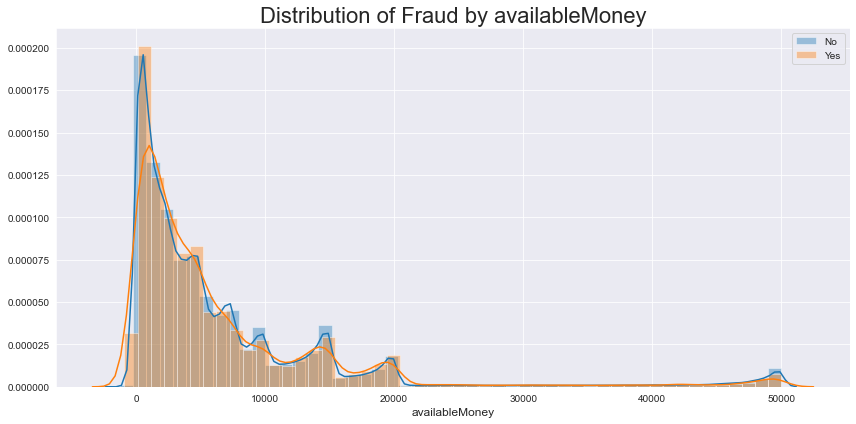

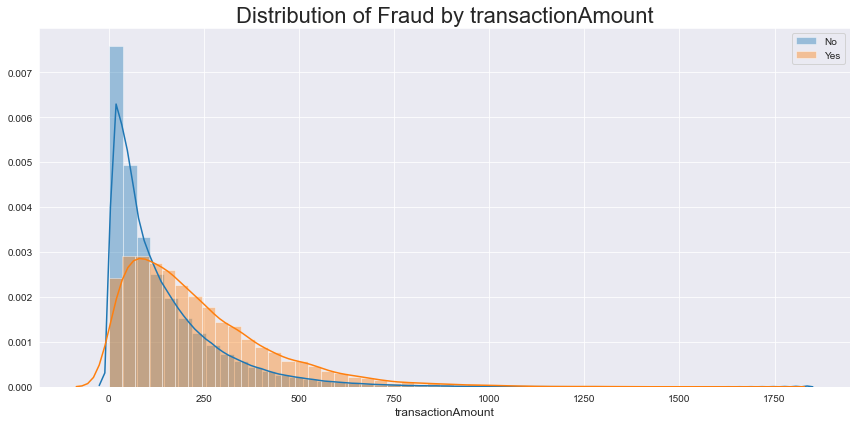

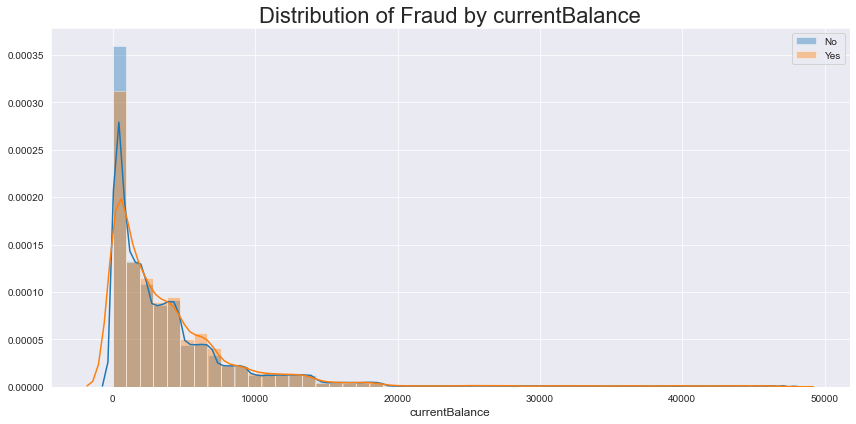

In [46]:
for i in df_con_new.columns:
    plt.figure(figsize = (12,6))
    ax = sns.distplot(df_new[(df_new['isFraud'] == 'No')][i])
    ax = sns.distplot(df_new[(df_new['isFraud'] == 'Yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of Fraud by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> Karena skala perbandingan data yang imbalanced, cukup sulit untuk melihat pola jika hanya melalui gambar di atas. Maka kita kelompokkan dan fokuskan hanya pada yang **fraud** saja.

In [47]:
con_fraud = df_con_new[df_new['isFraud'] == 'Yes']

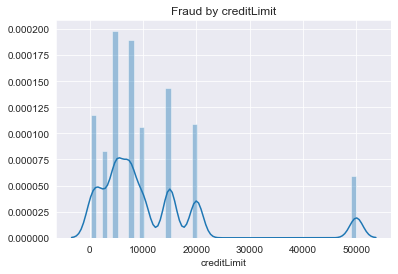

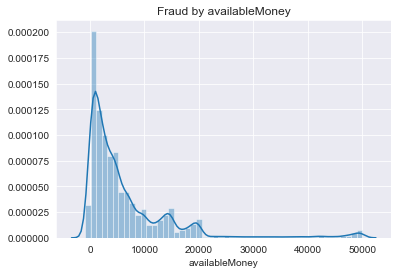

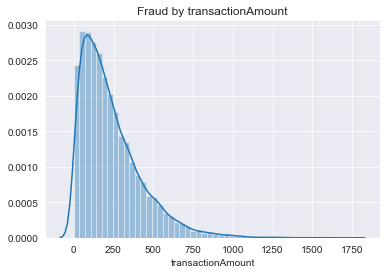

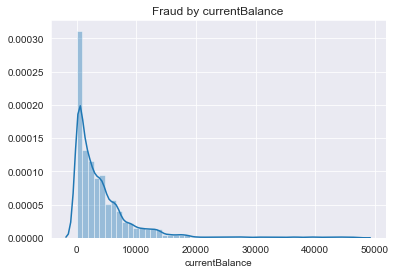

In [48]:
for i in con_fraud.columns :
    sns.distplot(con_fraud[i])
    plt.title('Fraud by ' + i)
    plt.show()

> Walaupun pada gambar diatas tampak lebih jelas polanya, tetapi jika kita lakukan perhitungan dengan `value_counts()`, kita temukan bahwa pola yang jelas hanya terjadi pada **creditLimit**. Sisa feature lainnya terdapat pola, tetapi mungkin masih belum cukup untuk di jadikan bukti.

In [49]:
for i in con_fraud.columns:
    print(con_fraud[i].value_counts().head())

5000     2149
7500     2055
15000    1554
20000    1180
10000    1146
Name: creditLimit, dtype: int64
5000.0     81
250.0      66
20000.0    63
15000.0    57
7500.0     45
Name: availableMoney, dtype: int64
0.00      92
121.45     4
81.78      4
167.77     4
212.60     4
Name: transactionAmount, dtype: int64
0.00       466
1649.74      3
4198.33      2
4031.06      2
4573.60      2
Name: currentBalance, dtype: int64


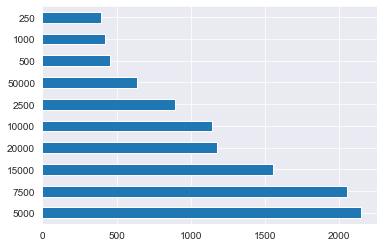

In [50]:
# visualisasi credit limit pada fraud

con_fraud['creditLimit'].value_counts().sort_values(ascending = False).plot(kind = 'barh')

> Pada feature **creditLimit** terlihat jelas memang kebanyakan customer yang **fraud** memiliki limit bervariasi antara 5.000 sampai 20.000 dollar. Perhitungan terbanyak ada pada 5.000 dan 7.500 dollar. Sehingga memang dapat disimpulkan, customer yang **fraud**, mereka memiliki limit yang cukup rendah, yaitu kebanyakan di kisaran 5.000 atau 7.500 dollar saja.

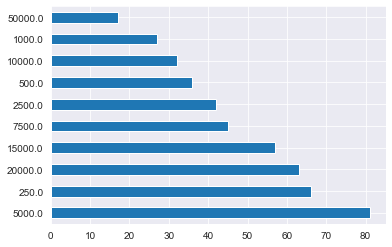

In [51]:
# visualisasi availableMoney pada fraud

con_fraud['availableMoney'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh')

> Feature **availableMoney** merupakan jumlah uang tersisa di akun sebelum dilakukan penyesuaian dengan biaya yang tertunda. Terlihat bahwa customer yang **fraud**, mereka memiliki jumlah yang bervariasi, sekitar 250 sampai 20.000 dollar. Dengan perhitungan terbanyak pada 250 dan 5.000 dollar biaya yang tertunda pada rekeningnya.

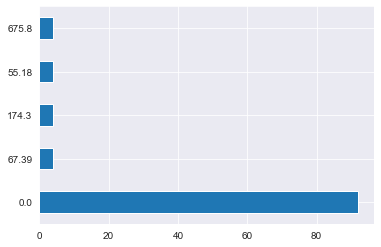

In [52]:
# visualisasi transactionAmount pada fraud

con_fraud['transactionAmount'].value_counts().sort_values(ascending = False).head().plot(kind = 'barh')

> Customer yang **fraud** kebanyakan tidak memiliki transaksi sebelumnya, sehingga kita bisa melihat bahwa banyak dari mereka yang memiliki besaran transaksi sebesar 0 dollar.

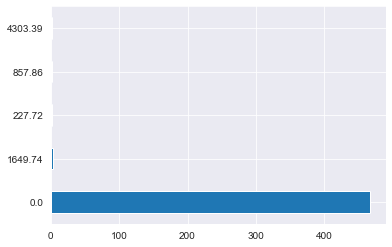

In [53]:
# visualisasi currentBalance pada fraud

con_fraud['currentBalance'].value_counts().sort_values(ascending = False).head().plot(kind = 'barh')

> Selain itu, mereka yang **fraud** juga biasanya tidak memilki uang yang tersedia pada kartu debit nya. Sehingga saldo mereka kebanyakan adalah 0 dollar. 

> Saya rasa sudah cukup untuk feature ini. Selanjutnya kita mulai eksplorasi pada data categorical *(object datatype)*.

### CATEGORICAL DATA

> Pertama - tama, sama seperti pada numerical features, kita akan melakukan penghitungan korelasi pada setiap features.

In [54]:
# cramers untuk categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [55]:
corr = []
for i in df_new.select_dtypes(['object']):
    matrix = []
    for j in df_new.select_dtypes(['object']):
        matrix.append(cramersv(df_new.select_dtypes(['object'])[i], df_new.select_dtypes(['object'])[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df_new.select_dtypes(['object']).columns, columns = df_new.select_dtypes(['object']).columns)

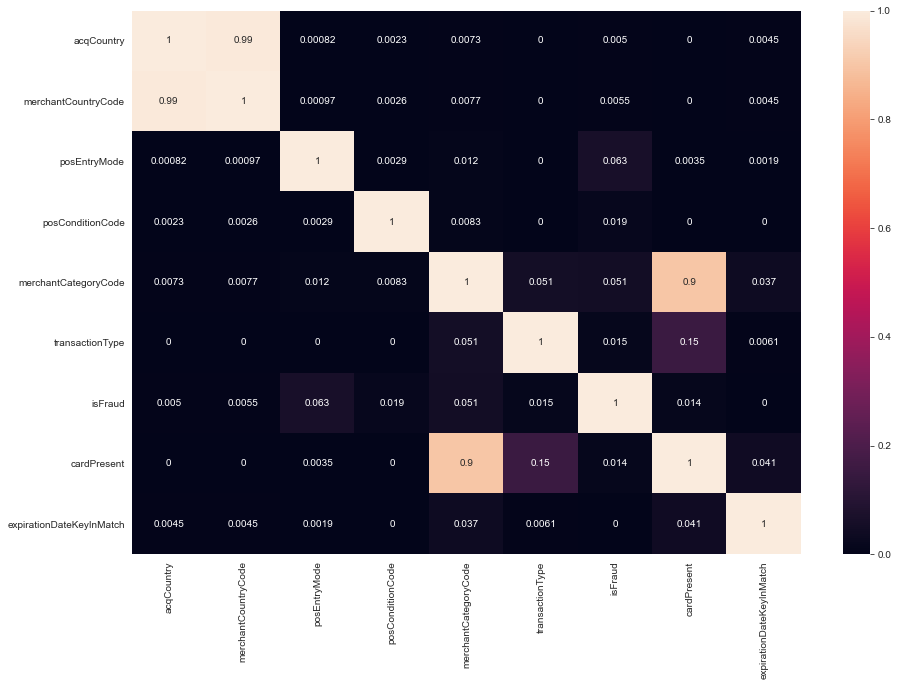

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_cat, annot = True)

> Hasil korelasi untuk data categorical. Terdapat beberapa features yang berkorelasi cukup kuat, diantaranya yaitu : **acqCountry** dengan **merchantCountryCode** dan **merchantCategoryCode** dengan **cardPresent**, selanjutnya walaupun belum cukup kuat yaitu **transactionType** dengan **cardPresent**.  Untuk eksplorasi lebih lanjut, maka kita akan bentuk dataframe baru, lalu menggunakan `pd.crosstab()` untuk mengetahui detailnya.

In [57]:
df_cat_new = df_new.select_dtypes(['object'])

> Kita mulai proses ini dari **acqCountry**, yaitu negara tempat mechant berasal dengan **merchantCountryCode** yaitu kode negara untuk merchant tertentu.

In [58]:
pd.crosstab(df_cat_new['acqCountry'], df_cat_new['merchantCountryCode'], normalize = True)

merchantCountryCode,CAN,MEX,PR,US
acqCountry,,,,
CAN,0.002906,0.000000,0.000000,0.000022
MEX,0.000000,0.004092,0.000000,0.000017
PR,0.000000,0.000000,0.001866,0.000014
US,0.000013,0.000016,0.000013,0.991040


> Dapat kita lihat melalui crosstab diatas, bahwa memang merchant yang berasal dari US memang mendominasi (99,1% dari total). Sehingga kemungkinan besar nantinya customer yang fraud juga melakukan transaksi dengan merchant yang berasal dari US ini.

> Selanjutnya **merchantCategoryCode**, yaitu kode kategori merchant dengan **cardPresent**, yaitu kondisi dimana kartu secara fisik terlihat pada saat transaksi. 

In [59]:
pd.crosstab(df_cat_new['merchantCategoryCode'], df_cat_new['cardPresent'], normalize = 'columns')

cardPresent,No,Yes
merchantCategoryCode,,
airline,0.026431,0.003249
auto,0.002710,0.030563
cable/phone,0.003772,0.000611
entertainment,0.023284,0.203014
fastfood,0.017207,0.316343
food,0.011678,0.213341
food_delivery,0.014682,0.000000
fuel,0.002195,0.072355
furniture,0.000809,0.025006


> Dari data crosstab diatas dapat terlihat bahwa keadaan fisik kartu tidak terlihat pada kategori merchant online retail, ini dapat dimaklumi. Dan keadaan kartu terlihat pada saat transaksi fast food. Ini juga masuk akal.

> Yang terakhir adalah **transactionType** yaitu tipe transaksi, dengan **cardPresent**.

In [60]:
pd.crosstab(df_cat_new['transactionType'], df_cat_new['cardPresent'], normalize = True)

cardPresent,No,Yes
transactionType,,
ADDRESS_VERIFICATION,0.025713,0.000000
PURCHASE,0.491484,0.457573
REVERSAL,0.013218,0.012012


> Terlihat melalui crosstab, memang sebagian besar transaksi adalah transaksi pembelian.

> Selanjutnya, kita lakukan eksplorasi menyeluruh pada feature categorical. Kolom **isFraud** di drop karena merupakan target feature dan sudah tervisualisasi di awal.

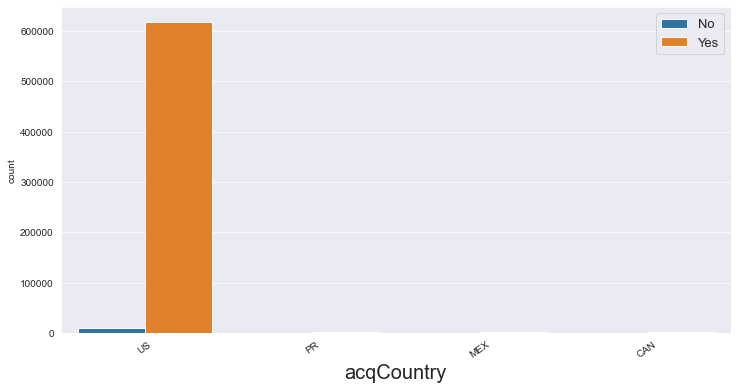

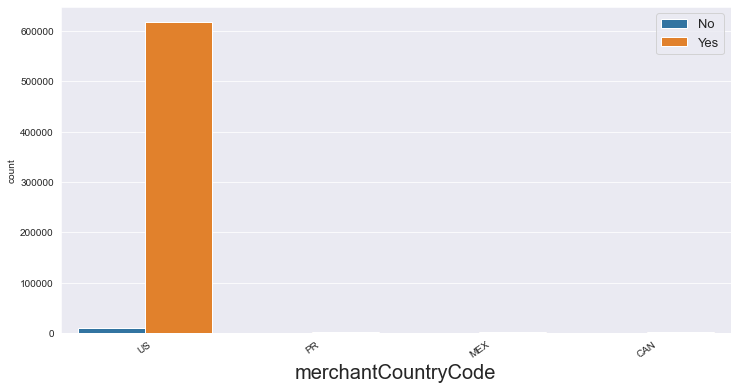

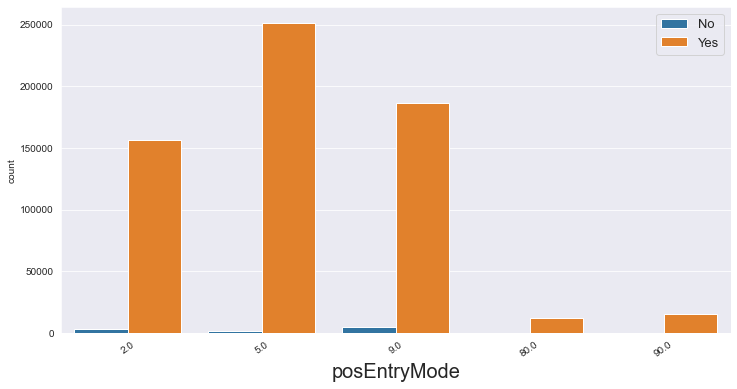

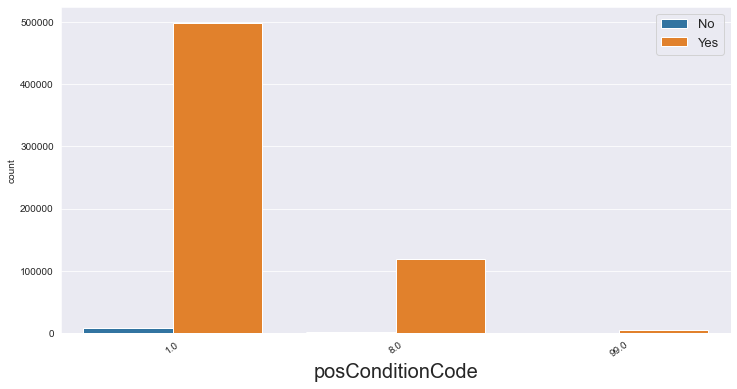

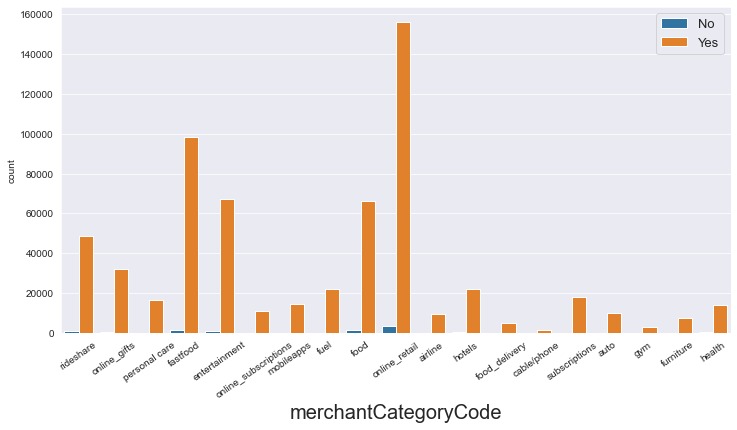

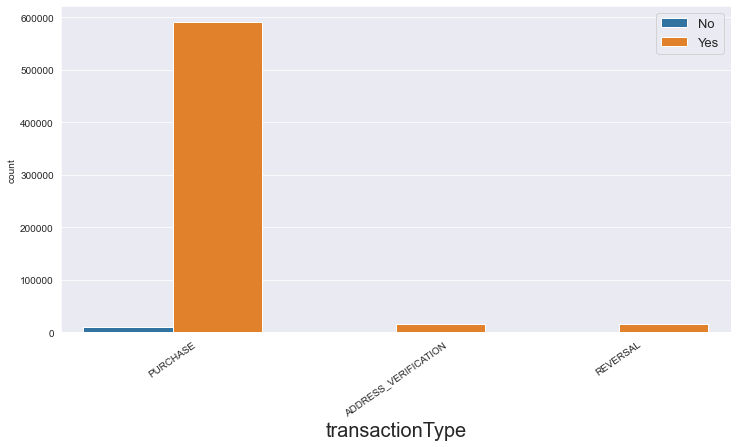

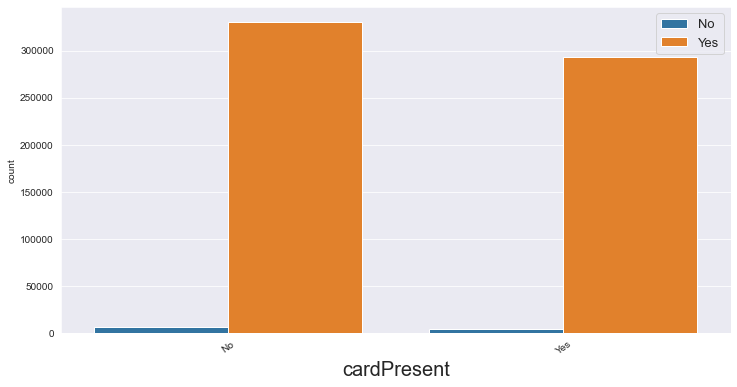

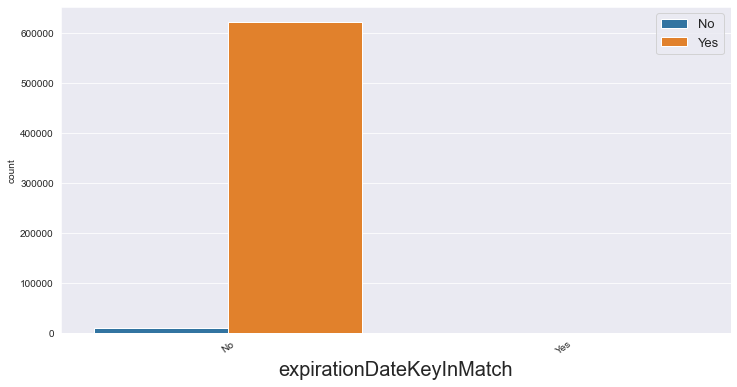

In [61]:
for i in df_cat_new.drop(columns = ['isFraud']):
    plt.figure(figsize = (12,6))
    ax = sns.countplot(x = i, data = df_new, hue = 'isFraud')
    plt.legend(labels, loc='upper right', fontsize = 13)
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

> Sebenarnya, `.countplot()` digunakan menghitung value dari categorical data. Tetapi karena data yang sangat tidak seimbang, maka sulit menemukan pola pada kategori yang **Fraud**. Maka, sama seperti sebelumnya, kita kelompokkan lagi yang **fraud** supaya lebih mudah untuk melihat polanya.

In [62]:
cat_fraud = df_cat_new[df_cat_new['isFraud'] == 'Yes']

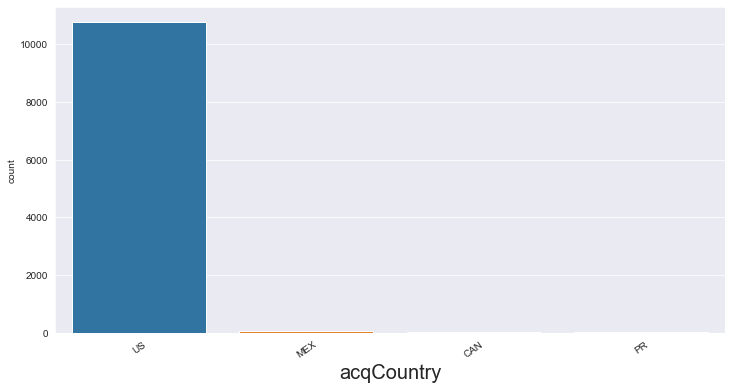

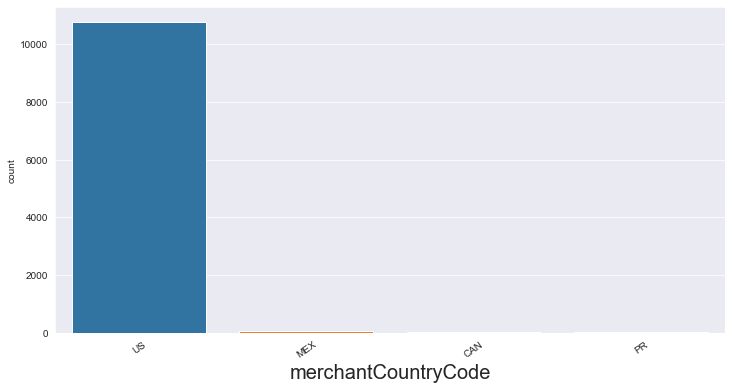

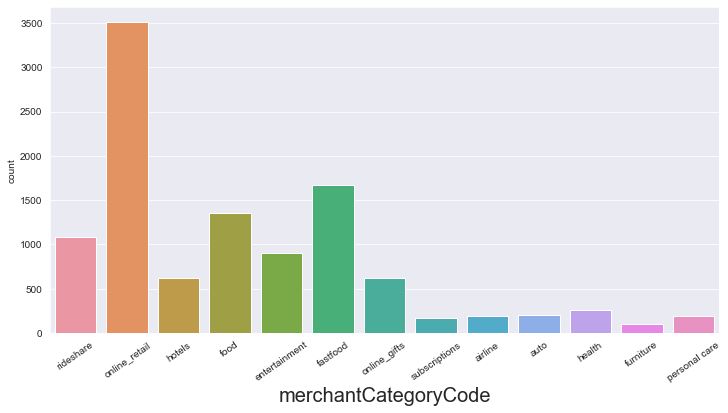

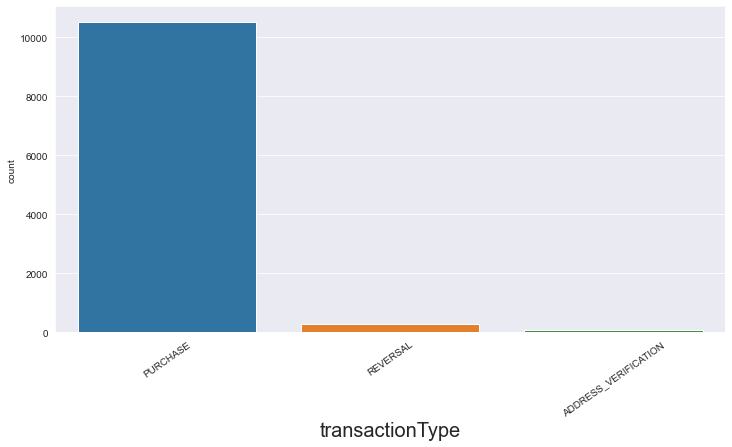

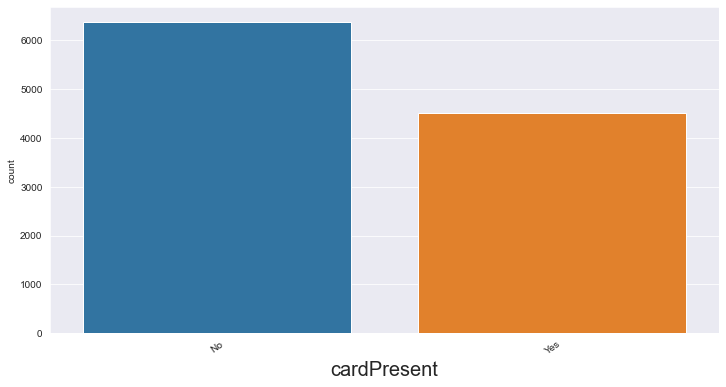

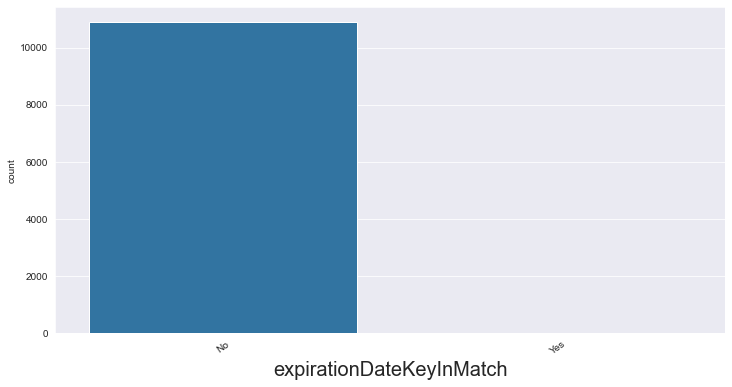

In [63]:
for i in cat_fraud.drop(columns = ['posEntryMode', 'posConditionCode', 'isFraud']) :
    plt.figure(figsize = (12,6))
    sns.countplot(cat_fraud[i])
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

> Dari plot diatas dapat di simpulkan bahwa dalam kategori **fraud** : 
- Sebagian besar merchant berlokasi di US, seperti yang sudah di singgung sebelumnya.
- Transaksi terbanyak pada merchant online retail, fastfood dan makanan lainnya.
- Tipe transaksi yang di lakukan adalah PURCHASE, walaupun sebagian besar mereka memang tidak membawa debit card.
- Tidak memiliki kesamaan tanggal expiration dalam system dan yang di input.

### DATETIME FEATURE

> Terakhir kita lakukan eksplorasi pada datetime feature untuk insight lebih lanjut. 

In [64]:
df_new_date = df_new.select_dtypes(['datetime64[ns]'])

In [65]:
df_new_date.head(3)

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange
0,2016-01-08 19:04:50,2020-01-04,2014-03-08,2014-03-08
1,2016-01-09 22:32:39,2023-01-06,2014-03-08,2014-03-08
2,2016-01-11 13:36:55,2027-01-12,2014-03-08,2014-03-08


> Kita lakukan loop di bawah ini untuk mendapatkan nama hari, nama bulan dan tahun.

In [66]:
for i in df_new_date :
    d = df_new_date[i + '_day'] = df_new_date[i].dt.day_name()
    m = df_new_date[i + '_month'] = df_new_date[i].dt.month_name()
    y = df_new_date[i + '_year'] = df_new_date[i].dt.year

In [67]:
df_new_date.head(3)

,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionDateTime_day,transactionDateTime_month,transactionDateTime_year,currentExpDate_day,currentExpDate_month,currentExpDate_year,accountOpenDate_day,accountOpenDate_month,accountOpenDate_year,dateOfLastAddressChange_day,dateOfLastAddressChange_month,dateOfLastAddressChange_year
0,2016-01-08 19:04:50,2020-01-04,2014-03-08,2014-03-08,Friday,January,2016,Saturday,January,2020,Saturday,March,2014,Saturday,March,2014
1,2016-01-09 22:32:39,2023-01-06,2014-03-08,2014-03-08,Saturday,January,2016,Friday,January,2023,Saturday,March,2014,Saturday,March,2014
2,2016-01-11 13:36:55,2027-01-12,2014-03-08,2014-03-08,Monday,January,2016,Tuesday,January,2027,Saturday,March,2014,Saturday,March,2014


> Kita fokuskan pada kategori **fraud** saja, sama seperti sebelumnya. Lalu setiap tanggal di pisah berdasarkan nama hari, bulan dan tahun.

In [68]:
date_fraud = df_new_date[df_new['isFraud'] == 'Yes']

In [69]:
days  = date_fraud[['transactionDateTime_day', 'currentExpDate_day', 'accountOpenDate_day', 'dateOfLastAddressChange_day']]
month = date_fraud[['transactionDateTime_month', 'currentExpDate_month', 'accountOpenDate_month', 'dateOfLastAddressChange_month']]
year  = date_fraud[['transactionDateTime_year', 'currentExpDate_year', 'accountOpenDate_year', 'dateOfLastAddressChange_year']]

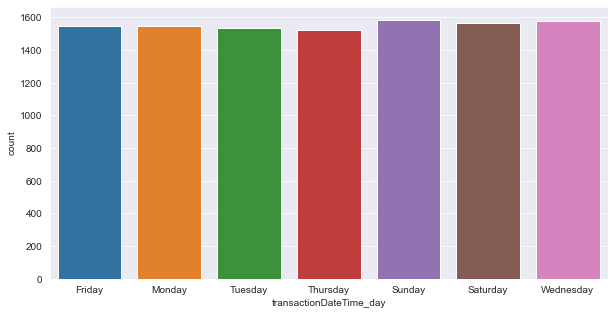

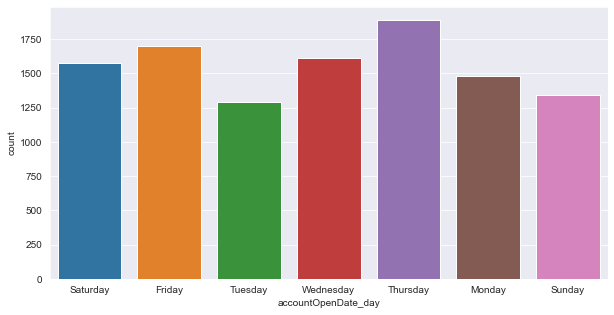

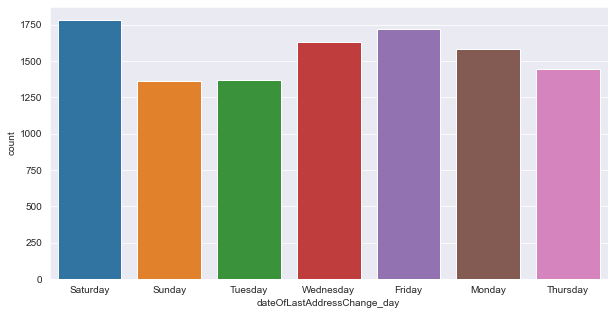

In [70]:
# Melihat pola fraud pada hari, currentExpDate_day di drop karena tidak relevan

for i in days.columns.drop('currentExpDate_day') :
    plt.figure(figsize = (10,5))
    sns.countplot(days[i])
    plt.show()

> 

> Dari plot di atas terlihat pola bahwa pada kategori **fraud** :
- Transaksi terjadi secara merata setiap hari.
- Pembuatan akun banyak di lakukan pada hari kamis dan jumat.
- Perubahan alamat banyak di lakukan pada hari sabtu.

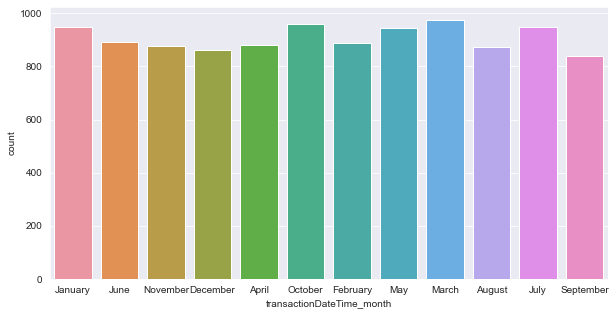

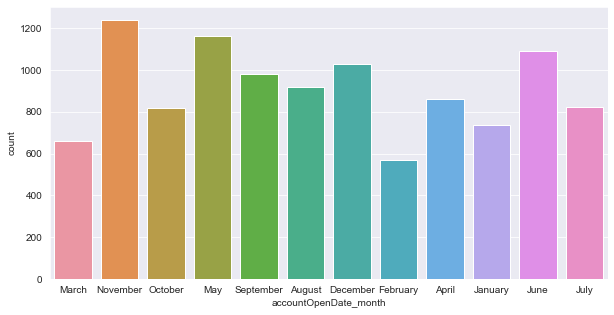

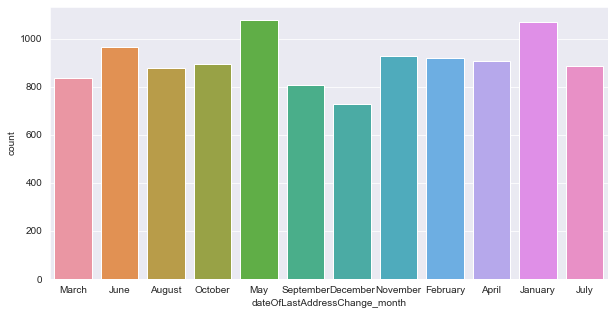

In [71]:
# Melihat pola fraud pada bulan, currentExpDate_month di drop karena tidak relevan

for i in month.columns.drop('currentExpDate_month') :
    plt.figure(figsize = (10,5))
    sns.countplot(month[i])
    plt.show()

>

> Dari plot di atas terlihat pola bahwa pada kategori **fraud** yaitu :
- Transaksi terjadi secara merata setiap bulan, namun pada bulan Maret dan Oktober terjadi sedikit peningkatan.
- Pembuatan akun banyak di lakukan pada hari bulan November dan Mei.
- Perubahan alamat banyak di lakukan pada bulan Mei dan Januari.

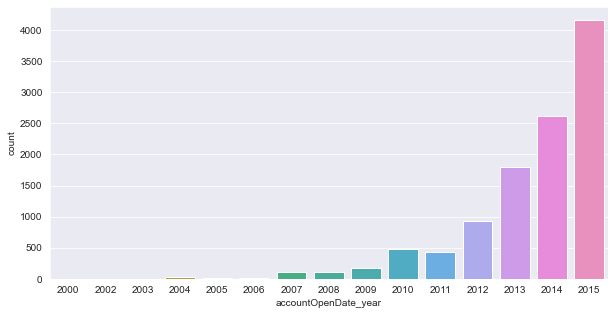

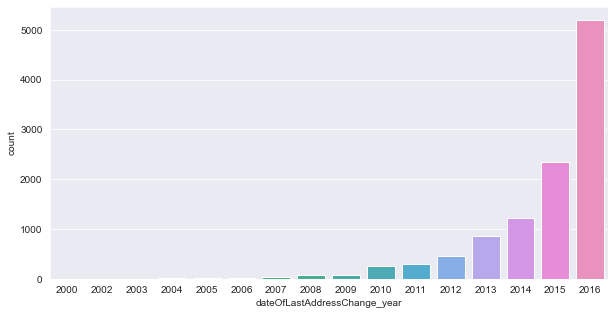

In [72]:
# Melihat pola fraud pada tahun, transactionDateTime_year dan currentExpDate_year di drop karena tidak relevan

for i in year.drop(columns = ['transactionDateTime_year', 'currentExpDate_year']) :
    plt.figure(figsize = (10,5))
    sns.countplot(year[i])
    plt.show()

> 

> Dari plot di atas terlihat bahwa pada kategori **fraud** dapat terlihat bahwa memang setiap tahunnya terjadi peningkatan dalam transaksi baik pembukaan akun, maupun pergantian alamat.

## SUMMARY

> Melalui eksplorasi data yang di lakukan, walaupun lumayan sulit untuk mengetahui atau mendapatkan pola dari customer yang **fraud**, kita dapat ketahui bahwa ada sekitar 10.892 customer atau sekitar 2% dari total seluruh customer yang tercatat sebagai **fraud**. Kita juga mengetahui bahwa fraud terjadi hampir merata di setiap hari, setiap tahun jumlahnya terus meningkat. Walaupun bisa saja kemungkinan ini terjadi karena mungkin jumlah customer nya yang memang mengalami peningkatan, databasenya yang bertambah, atau karena hal lainnya. Jika kita lihat porsi peritungan per bulannya, kita akan temukan bahwa ada sedikit peningkatan pada bulan **Maret** dan **Oktober** walaupun tidak terlalu signifikan. 

> Para customer yang **fraud** sering berbelanja pada merchant yang memiliki kategori **online retail**, **fastfood** atau **makanan lainnya**, sebagian besar dari merchant tersebut berasal dari **US**. Tipe transaksi yang banyak di lakukan pada adalah **PURCHASE** atau pembelian. Dan sebagian besar dari mereka yang **fraud** tidak membawa debit card, serta tidak memiliki kesamaan tanggal expiration yang tercatat dalam system dan yang di input. 

> Feature lain yang memiliki korelasi signifikan yaitu **creditLimit dengan availableMoney** dan **creditLimit dengan currentBalance**. Selain itu **availableMoney dengan currentBalance** juga terdapat korelasi tetapi belum cukup signifikan. Melalui `pairplot()` terlihat memang features2 yang disebutkan tadi diatas memiliki persebaran cukup berpola, walaupun pola persebarannya sulit di lihat, tetapi jika diperhatikan dengan seksama kita akan menemukan pola dimana pada customer yang **fraud**, kebanyakan sebaran credit limitnya masih di kisaran 20.000 dollar atau lebih rendah lagi, sementara mereka yang tidak **fraud** berada di kisaran 30.000 sampai 50.000 dollar. Terlihat juga pada customer yang **fraud**, mereka memiliki credit limit dan available money yang cenderung lebih sedikit dibandingkan mereka yang tidak **fraud**.

> Kurang lebih demikian pola yang dapat di lihat melalui ekplorasi dari data *transaction* ini. Selanjutnya saya akan drop dataframe yang sudah di bersihkan sehingga memudahkan prosedur Machine Learning nanti.

In [73]:
df_new.head()

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,creditLimit,availableMoney,transactionAmount,currentBalance,transactionDateTime,currentExpDate,accountOpenDate,dateOfLastAddressChange,isFraud,cardPresent,expirationDateKeyInMatch
0,US,US,5,1,rideshare,PURCHASE,5000,5000.00,111.33,0.00,2016-01-08 19:04:50,2020-01-04,2014-03-08,2014-03-08,Yes,No,No
1,US,US,9,1,rideshare,PURCHASE,5000,4888.67,24.75,111.33,2016-01-09 22:32:39,2023-01-06,2014-03-08,2014-03-08,No,No,No
2,US,US,5,1,rideshare,PURCHASE,5000,4863.92,187.40,136.08,2016-01-11 13:36:55,2027-01-12,2014-03-08,2014-03-08,No,No,No
3,US,US,2,1,rideshare,PURCHASE,5000,4676.52,227.34,323.48,2016-01-11 22:47:46,2029-01-09,2014-03-08,2014-03-08,Yes,No,No
4,US,US,2,1,rideshare,ADDRESS_VERIFICATION,5000,4449.18,0.00,550.82,2016-01-16 01:41:11,2024-01-10,2014-03-08,2014-03-08,No,No,No


In [74]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   acqCountry                633846 non-null  object        
 1   merchantCountryCode       633846 non-null  object        
 2   posEntryMode              633846 non-null  object        
 3   posConditionCode          633846 non-null  object        
 4   merchantCategoryCode      633846 non-null  object        
 5   transactionType           633846 non-null  object        
 6   creditLimit               633846 non-null  int64         
 7   availableMoney            633846 non-null  float64       
 8   transactionAmount         633846 non-null  float64       
 9   currentBalance            633846 non-null  float64       
 10  transactionDateTime       633846 non-null  datetime64[ns]
 11  currentExpDate            633846 non-null  datetime64[ns]
 12  ac

In [75]:
df_new.to_csv('transaction_clean.csv', index=False)